In [41]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import chi2, t

In [3]:
n, a, sigma = 120, -4, 4

In [30]:
X = normal(a, sigma, n)
#print(np.mean(X**2) - np.mean(X)*np.mean(X))
print(X)

[-3.63533986e+00 -4.23428039e+00 -1.26320496e+00 -4.46701608e+00
 -9.90333159e+00  4.20466687e+00 -3.98342758e+00  2.76721238e-01
 -4.46616638e+00 -3.22625722e-01 -1.41724884e+01  5.25778964e-01
 -7.06853150e+00 -1.03708409e+01 -5.31493552e+00 -9.16498352e+00
 -5.54811261e+00 -1.25713307e+00 -6.03699715e+00 -2.11006757e+00
 -6.06322503e+00 -4.41718852e+00 -2.91401398e+00  1.75704741e+00
 -7.34393611e+00 -4.07476683e+00 -3.71887773e+00 -8.27157674e-01
 -4.16759561e+00 -3.10328661e+00  1.49743045e+00 -6.60738000e+00
 -5.12504733e+00 -8.63739764e+00  4.59116280e+00 -3.83775863e+00
 -1.38859531e+00 -1.14118549e+01  6.02570376e+00 -6.62754054e+00
 -3.28587651e+00 -3.41694043e+00 -7.12669774e+00 -8.95688344e-01
  1.64091689e+00 -4.77162573e+00 -4.35493608e+00 -9.27234830e+00
 -2.88968080e+00  3.94868158e+00 -8.34306526e-01 -7.20167329e-01
 -9.42709375e+00 -4.07867708e+00  3.17778683e+00 -2.14433081e-03
 -6.98531792e+00 -7.44986877e+00 -5.86059503e+00 -3.66518367e+00
  2.81436311e+00  1.41291

In [38]:
S2 = 1/(len(X)-1)*np.sum((X-np.mean(X))**2)
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 

quantiles = chi2.ppf(probs, df)
print(quantiles)
sigma1 = (S2*(n-1)/quantiles[1])**0.5
sigma2 = (S2*(n-1)/quantiles[0])**0.5
print("Sigma interval:", round(sigma1, 3), round(sigma2, 3))


[ 94.81123694 145.46074022]
Sigma interval: 3.559 4.408


In [46]:
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 
mx = np.mean(X)
quantiles = t.ppf(probs, df)
a1 = mx - (S2/n)**0.5*quantiles[1] 
a2 = mx - (S2/n)**0.5*quantiles[0]
print("ME intervals:", round(a1, 3), round(a2, 3))

ME intervals: -4.489 -3.298


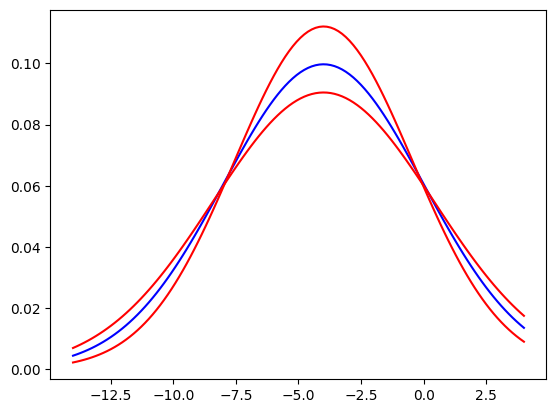

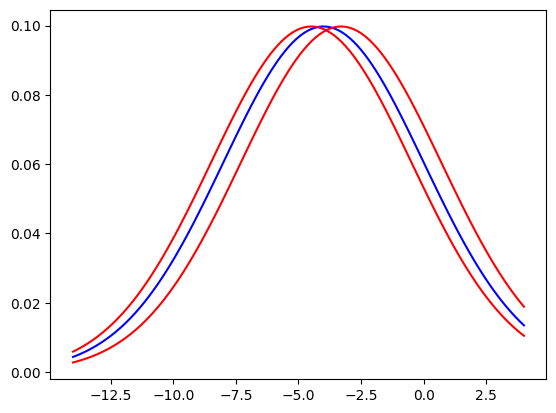

In [53]:
x = np.linspace(-14, 4, 120)
y = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a)**2/(2*sigma**2)) for i in x]
y1 = [1/(2*math.pi)**0.5/sigma1*math.e**(-(i-a)**2/(2*sigma1**2)) for i in x]
y2 = [1/(2*math.pi)**0.5/sigma2*math.e**(-(i-a)**2/(2*sigma2**2)) for i in x]

y11 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a1)**2/(2*sigma**2)) for i in x]
y22 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a2)**2/(2*sigma**2)) for i in x]

plt.plot(x, y, color="blue")
plt.plot(x, y1, color="red")
plt.plot(x, y2, color="red")
plt.show()

plt.plot(x, y, color="blue")
plt.plot(x, y11, color="red")
plt.plot(x, y22, color="red")
plt.show()

7


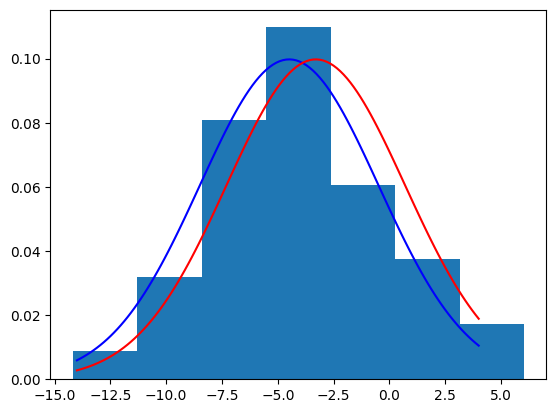

In [63]:
intervals = int(np.log2(n))+1
print(intervals)

plt.hist(X, bins=intervals, density=True)
plt.plot(x, y11, color="blue")
plt.plot(x, y22, color="red")
plt.show()